# ENCS5343 :Computer Vision
<h4>Course Project: <br> Arabic Handwritten Text Identification Using Deep Learning </h4>

<h4> <b>Mohammed Abed Alkareem - 1210708</b> </h4>

Dataset Link: https://data.mendeley.com/datasets/2h76672znt/1/files/9031138a-b812-433e-a704-8acb1707936e

<p>The dataset contains 65 different Arabic alphabets (with variations on begin, middle, end and regular alphabets), 10 different Arabic words (that encompass all Arabic alphabets) and 3 different paragraphs. The dataset was collected anonymously from 82 different users. Each user was asked to write each alphabet and word 10 times. A userid uniquely but anonymously identifies the writer of each alphabet, word and paragraph. In total, the dataset consists of 53199 alphabet images, 8144 word images and 241 paragraph images.</p>

- The file **"isolated_words_per_user.zip"** contains 8144 Arabic words organized into one folder per user

In [1]:
# download the dataset from the Mendeley Data
!wget https://data.mendeley.com/public-files/datasets/2h76672znt/files/9031138a-b812-433e-a704-8acb1707936e/file_downloaded -O isolated_words_per_user.zip

--2024-12-24 19:17:59--  https://data.mendeley.com/public-files/datasets/2h76672znt/files/9031138a-b812-433e-a704-8acb1707936e/file_downloaded
Loaded CA certificate '/usr/ssl/certs/ca-bundle.crt'
Resolving data.mendeley.com (data.mendeley.com)... 162.159.133.86, 162.159.130.86
Connecting to data.mendeley.com (data.mendeley.com)|162.159.133.86|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com/56076a80-b848-4c11-bc65-fa1a0423c35e [following]
--2024-12-24 19:18:00--  https://prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com/56076a80-b848-4c11-bc65-fa1a0423c35e
Resolving prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com (prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com)... 3.5.68.159, 3.5.71.202, 52.218.85.56, ...
Connecting to prod-dcd-datasets-public-files-eu-west-1.s3.eu-west-1.amazonaws.com (prod-dcd-datasets-public-files-eu-wes

In [2]:
# unzip the dataset
import zipfile

with zipfile.ZipFile('isolated_words_per_user.zip', 'r') as zip_ref:
    zip_ref.extractall('isolated_words_per_user')

In [48]:
import torch
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose(
    [transforms.Resize((224, 224)), # Resize the image to 224x224 because there is no standard size for the images in the dataset
        transforms.ToTensor(),
        #make gray scale with 1 channel
        transforms.Grayscale(num_output_channels=1),
     transforms.Normalize((0.5,), (0.5,))])


# Define data augmentation for training !!!!!! change it to the one you want to use
aug_transform = transforms.Compose([
    transforms.RandomResizedCrop(224),  # Randomly crop and resize to 224x224
    transforms.RandomHorizontalFlip(),  # Randomly flip images horizontally
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),  # Randomly change brightness, contrast, saturation, and hue
    transforms.RandomRotation(30),      # Randomly rotate images up to 30 degrees
    transforms.ToTensor(),              # Convert to tensor
    transforms.Grayscale(num_output_channels=1), #make gray scale with 1 channel
    transforms.Normalize((0.5,), (0.5,))  # Normalize
])


# Load the dataset
dataset = torchvision.datasets.ImageFolder(root='isolated_words_per_user/isolated_words_per_user', transform=transform)
augmented_dataset = torchvision.datasets.ImageFolder(root='isolated_words_per_user/isolated_words_per_user', transform=aug_transform)


# Split the dataset into training and testing
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

#split the training to training and validation
train_size = int(0.8 * len(train_dataset))
val_size = len(train_dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(train_dataset, [train_size, val_size])


train_aug_size = int(0.8 * len(augmented_dataset))
test_aug_size = len(augmented_dataset) - train_aug_size
train_augmented_dataset, test_augmented_dataset = torch.utils.data.random_split(augmented_dataset, [train_aug_size, test_aug_size])

#split the training to training and validation
train_aug_size = int(0.8 * len(train_augmented_dataset))
val_aug_size = len(train_augmented_dataset) - train_aug_size
train_augmented_dataset, val_augmented_dataset = torch.utils.data.random_split(train_augmented_dataset, [train_aug_size, val_aug_size])



In [49]:
#classes are directory names in the dataset
classes = dataset.classes

In [50]:
classes

['user001',
 'user002',
 'user003',
 'user004',
 'user005',
 'user006',
 'user007',
 'user008',
 'user009',
 'user010',
 'user011',
 'user012',
 'user013',
 'user014',
 'user015',
 'user016',
 'user017',
 'user018',
 'user019',
 'user020',
 'user021',
 'user022',
 'user023',
 'user024',
 'user025',
 'user026',
 'user027',
 'user028',
 'user029',
 'user030',
 'user031',
 'user032',
 'user033',
 'user034',
 'user035',
 'user036',
 'user037',
 'user038',
 'user039',
 'user040',
 'user041',
 'user042',
 'user043',
 'user044',
 'user045',
 'user046',
 'user047',
 'user048',
 'user049',
 'user050',
 'user051',
 'user052',
 'user053',
 'user054',
 'user055',
 'user056',
 'user057',
 'user058',
 'user059',
 'user060',
 'user061',
 'user062',
 'user063',
 'user064',
 'user065',
 'user066',
 'user067',
 'user068',
 'user069',
 'user070',
 'user071',
 'user072',
 'user073',
 'user074',
 'user075',
 'user076',
 'user077',
 'user078',
 'user079',
 'user080',
 'user081',
 'user082']

In [51]:
#define data loaders

batch_size = 16

train_loader = torch.utils.data.DataLoader(
    train_dataset,
      batch_size=batch_size,
        shuffle=True)

val_loader = torch.utils.data.DataLoader(
    val_dataset,
      batch_size=batch_size,
        shuffle=False)

test_loader = torch.utils.data.DataLoader(
    test_dataset,
      batch_size=batch_size,
        shuffle=False)

train_aug_loader = torch.utils.data.DataLoader(
    train_augmented_dataset,
      batch_size=batch_size,
        shuffle=True)

val_aug_loader = torch.utils.data.DataLoader(
    val_augmented_dataset,
      batch_size=batch_size,
        shuffle=False)

test_aug_loader = torch.utils.data.DataLoader(
    test_augmented_dataset,
      batch_size=batch_size,
        shuffle=False)


In [52]:
print(f'Total batches in trainloader: {len(train_loader)}')
print(f'Total batches in valloader: {len(val_loader)}')
print(f'Total batches in testloader: {len(test_loader)}')


Total batches in trainloader: 326
Total batches in valloader: 82
Total batches in testloader: 102


In [53]:
#print shape of one image
dataiter = iter(train_loader)
images, labels = next(dataiter)

print(f"batch shape: {images.shape}")
print(f"image shape: {images[0].shape}")

batch shape: torch.Size([16, 1, 224, 224])
image shape: torch.Size([1, 224, 224])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


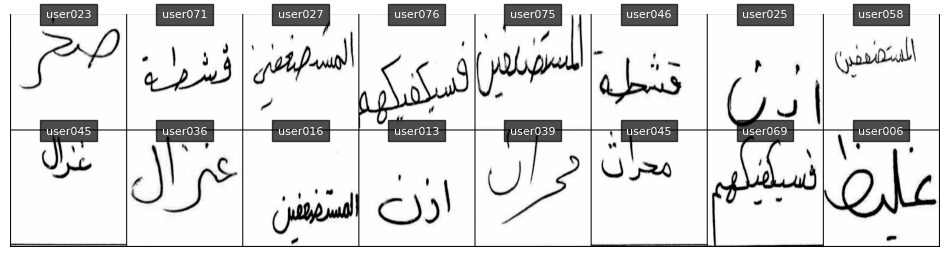

In [54]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision

# Functions to show an image
def imshow(img, title):
    img = img / 2 + 0.5  # Unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.axis('off')
    plt.title(title)

# Get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)

# Create a grid of images
nrow = 8  # Number of images per row
grid_img = torchvision.utils.make_grid(images, nrow=nrow, padding=2)
grid_npimg = grid_img.numpy().transpose((1, 2, 0))  # Prepare the image grid for display

# Calculate image dimensions
img_height = grid_npimg.shape[0] // (len(images) // nrow + (1 if len(images) % nrow > 0 else 0))
img_width = grid_npimg.shape[1] // nrow

# Display the grid with class labels
plt.figure(figsize=(12, 8))
plt.imshow(grid_npimg)
plt.axis('off')

# Add class labels on top of each image
for i in range(len(images)):
    row = i // nrow
    col = i % nrow
    label = classes[labels[i]]
    x = col * img_width + img_width // 2  # Center horizontally in the image
    y = row * img_height + 10            # Place slightly above the image
    plt.text(x, y, label, ha='center', va='bottom', fontsize=8, color='white',
             bbox=dict(facecolor='black', alpha=0.7))

plt.show()


## Models

In [61]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# Define the CNN model
class NetCNN(nn.Module):
    def __init__(self):
        super(NetCNN, self).__init__()

        self.conv1 = nn.Conv2d(1, 6, kernel_size=3, padding=1)  # 3 input channels, 16 output channels
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)  # Max pooling with 2x2 kernel
        self.conv2 = nn.Conv2d(6, 9, kernel_size=3, padding=1)  # 16 input channels, 32 output channels

        self.fc1 = nn.Linear(9 * 56 * 56, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 102)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))

        x = torch.flatten(x, 1)  # Flatten the tensor
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


In [62]:
net = NetCNN()

device = torch.device('cuda:0'if torch.cuda.is_available() else'cpu')
# Assuming that we are on a CUDA machine, this should print a CUDA device:
print(device)

net.to(device)

torch.cuda.get_device_name(0)

cuda:0


'NVIDIA GeForce GTX 1050'

In [63]:
net

NetCNN(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 9, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=28224, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=102, bias=True)
)

In [64]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
#adam optimizer
optimizer = optim.Adam(net.parameters(), lr=0.001)

In [65]:
import matplotlib.pyplot as plt

# Initialize lists to store average loss, validation loss, and accuracy for each epoch
epoch_loss_history = []
epoch_val_loss_history = []
epoch_train_acc_history = []
epoch_val_acc_history = []

# Early stopping parameters
min_delta = 0.001  # Minimum change to qualify as an improvement
patience = 6  # Number of epochs to wait for improvement
best_val_loss = float('inf')  # Initialize the best validation loss to a very large number
increase_counter = 0  # Counter for consecutive increases in validation loss

epochs = 100  # Total number of epochs to train

net.train()  # Set the model to training mode
for epoch in range(epochs):  # Loop over the dataset multiple times
    running_loss = 0.0  # Initialize running loss for the training data
    val_running_loss = 0.0  # Initialize running loss for the validation data
    correct_train = 0  # Correct predictions during training
    total_train = 0  # Total samples during training
    correct_val = 0  # Correct predictions during validation
    total_val = 0  # Total samples during validation
    epoch_losses = []  # Store the losses for the current epoch
    print(f'Epoch {epoch + 1}')

    # Training loop
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()  # Zero the parameter gradients

        outputs = net(inputs)  # Forward pass
        loss = criterion(outputs, labels)  # Calculate loss
        loss.backward()  # Backward pass
        optimizer.step()  # Optimize the parameters

        running_loss += loss.item()  # Accumulate the running loss
        epoch_losses.append(loss.item())  # Store the loss for the current batch

        # Calculate accuracy for the current batch
        _, predicted = torch.max(outputs.data, 1)  # Get predicted classes
        total_train += labels.size(0)  # Update total number of samples
        correct_train += (predicted == labels).sum().item()  # Update correct predictions

    average_loss = running_loss / len(train_loader)  # Calculate average loss for the epoch
    train_accuracy = correct_train / total_train  # Calculate training accuracy for the epoch
    epoch_loss_history.append(average_loss)  # Store the average loss
    epoch_train_acc_history.append(train_accuracy)  # Store the training accuracy

    # Validation phase
    net.eval()  # Set the model to evaluation mode
    with torch.no_grad():  # Disable gradient calculation
        for i, data in enumerate(val_loader, 0):
            inputs, labels = data
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = net(inputs)  # Forward pass
            val_loss = criterion(outputs, labels)  # Calculate validation loss

            val_running_loss += val_loss.item()  # Accumulate validation loss

            # Calculate accuracy for the current batch
            _, predicted = torch.max(outputs.data, 1)  # Get predicted classes
            total_val += labels.size(0)  # Update total number of samples
            correct_val += (predicted == labels).sum().item()  # Update correct predictions

    average_val_loss = val_running_loss / len(val_loader)  # Calculate average validation loss for the epoch
    val_accuracy = correct_val / total_val  # Calculate validation accuracy for the epoch
    epoch_val_loss_history.append(average_val_loss)
    epoch_val_acc_history.append(val_accuracy)  # Store the validation accuracy

    print(f'Epoch {epoch + 1} Average Loss: {average_loss:.3f}, Validation Loss: {average_val_loss:.3f}')
    print(f'Epoch {epoch + 1} Training Accuracy: {train_accuracy:.3f}, Validation Accuracy: {val_accuracy:.3f}')

    # Early stopping logic
    if average_val_loss < best_val_loss - min_delta:
        best_val_loss = average_val_loss
        increase_counter = 0  # Reset increase counter if there is an improvement
    else:
        if average_val_loss > best_val_loss:
            increase_counter += 1  # Increment increase counter if validation loss increases
        else:
            increase_counter = 0  # Reset increase counter if no increase

    # Early stopping condition: Stop training if validation loss increases for patience consecutive epochs
    if increase_counter >= patience:
        print(f"Early stopping due to validation loss increasing for {patience} consecutive epochs at epoch {epoch + 1}")
        break

print('='*50)
print('Finished Training')



Epoch 1
Epoch 1 Average Loss: 4.129, Validation Loss: 3.605
Epoch 1 Training Accuracy: 0.045, Validation Accuracy: 0.105
Epoch 2
Epoch 2 Average Loss: 3.146, Validation Loss: 3.048
Epoch 2 Training Accuracy: 0.172, Validation Accuracy: 0.203
Epoch 3
Epoch 3 Average Loss: 2.385, Validation Loss: 2.963
Epoch 3 Training Accuracy: 0.331, Validation Accuracy: 0.236
Epoch 4
Epoch 4 Average Loss: 1.572, Validation Loss: 3.341
Epoch 4 Training Accuracy: 0.536, Validation Accuracy: 0.219
Epoch 5
Epoch 5 Average Loss: 0.794, Validation Loss: 4.109
Epoch 5 Training Accuracy: 0.765, Validation Accuracy: 0.223
Epoch 6
Epoch 6 Average Loss: 0.310, Validation Loss: 5.120
Epoch 6 Training Accuracy: 0.910, Validation Accuracy: 0.230
Epoch 7
Epoch 7 Average Loss: 0.139, Validation Loss: 5.677
Epoch 7 Training Accuracy: 0.966, Validation Accuracy: 0.234
Epoch 8
Epoch 8 Average Loss: 0.119, Validation Loss: 6.283
Epoch 8 Training Accuracy: 0.971, Validation Accuracy: 0.224
Epoch 9
Epoch 9 Average Loss: 0.

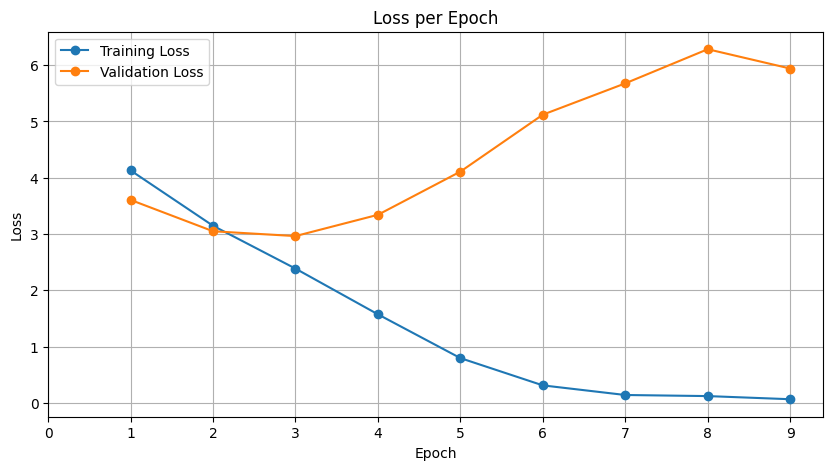

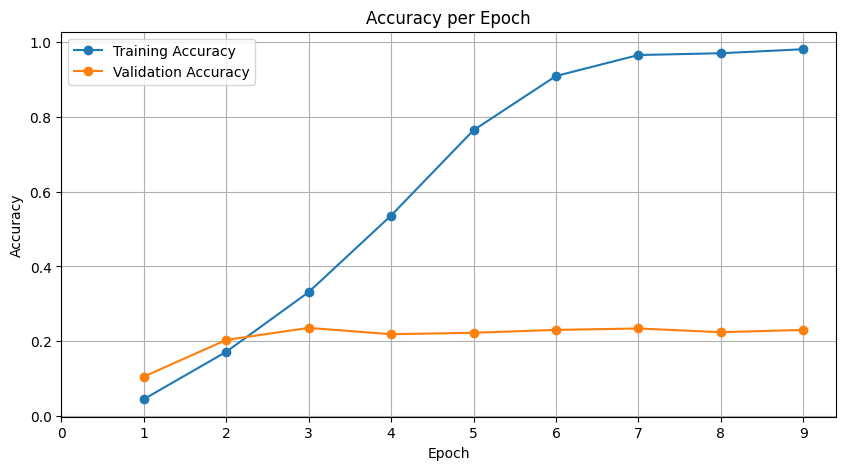

In [66]:
# Plotting the average loss per epoch
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(epoch_loss_history) + 1), epoch_loss_history, marker='o', label='Training Loss')
plt.plot(range(1, len(epoch_val_loss_history) + 1), epoch_val_loss_history, marker='o', label='Validation Loss')
plt.title('Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks(range(epoch+2))
plt.legend()
plt.grid(True)
plt.show()


# Plotting the accuracy per epoch
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(epoch_train_acc_history) + 1), epoch_train_acc_history, marker='o', label='Training Accuracy')
plt.plot(range(1, len(epoch_val_acc_history) + 1), epoch_val_acc_history, marker='o', label='Validation Accuracy')
plt.title('Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xticks(range(epoch+2))
plt.legend()
plt.grid(True)
plt.show()